In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

plt.figure(figsize = (20,16))
sns.set()

%matplotlib inline




In [9]:
dataset = pd.read_csv("cleanedData.csv")

dataset = dataset.iloc[:, 1:]

correlation_matrix = dataset.corr().round(2)


<Figure size 1440x1152 with 0 Axes>

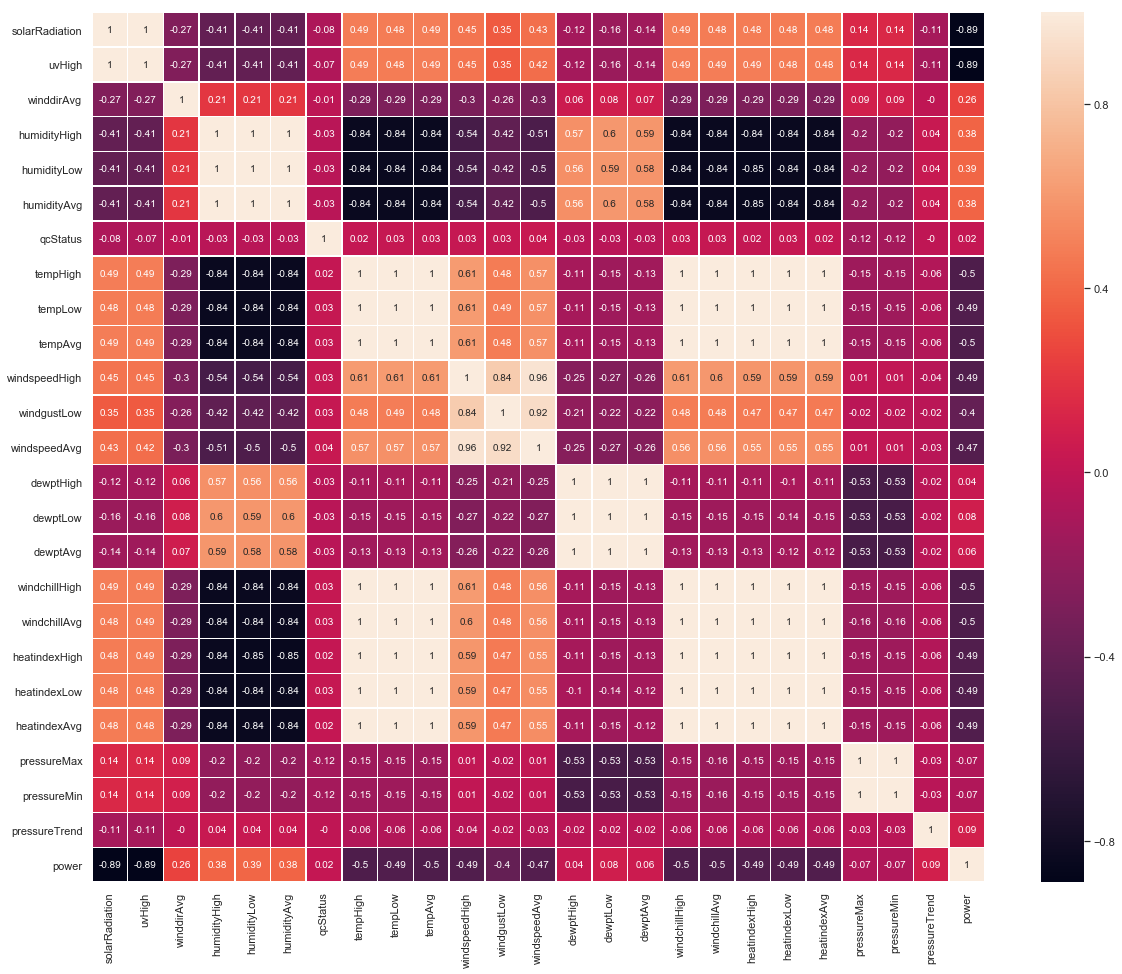

In [12]:
plt.figure(figsize = (20,16))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5)
plt.show()


In [14]:
corr_target = abs(correlation_matrix['power'])

relevant_features = corr_target [corr_target >= 0.5]
relevant_features

solarRadiation    0.89
uvHigh            0.89
tempHigh          0.50
tempAvg           0.50
windchillHigh     0.50
windchillAvg      0.50
power             1.00
Name: power, dtype: float64

The features of linear regression should not have multi-co-lineraty. For example there is 
strong relation between solarRadiation and uvHigh. Thus, there is not need to include both. Once we check this relation for every attributes, we remain with following attributes

In [28]:
relevant_features = ['solarRadiation', 'tempHigh']

X = pd.DataFrame(dataset[relevant_features])

Y = dataset.power

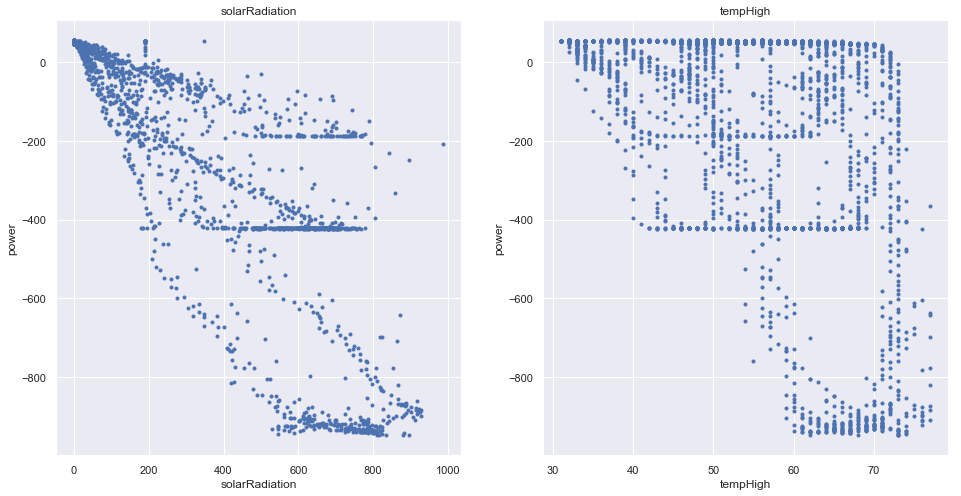

In [30]:
#The relationship of solarRadiation and tempHigh with a power
plt.figure(figsize=(16,8))

for i, col in enumerate(relevant_features):
    plt.subplot(1, len(relevant_features) , i+1)
    x = X[col]
    y = dataset.power
    plt.scatter(x, y, marker='.')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('power')
    

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=41)

lin_model = LinearRegression(normalize=True)
lin_model.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)

rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = mean_squared_error(Y_train, y_train_predict)

In [32]:
print(r2)

16873.37764979164
